In [1]:
import numpy
from matplotlib import pyplot

#No whitespace between the percent sign and "matplotlib".
%matplotlib inline

In [2]:
pyplot.rc('font', family='serif', size=16)

In [3]:
#Set parameters.
nx = 41
L = 2.0
dx = L / (nx - 1)

nu = 0.3

sigma = 0.2
dt = sigma * dx**2 / nu
nt = 20

In [4]:
x = numpy.linspace(0.0, L, num=nx)

In [5]:
u0 = numpy.ones(nx)
mask = numpy.where((x >= 0.5) & (x <= 1.0))
u0[mask] = 2.0

In [6]:
u = u0.copy()
for n in range(nt):
    un = u.copy()
    for i in range(1, nx - 1):
        u[i] = un[i] + sigma * (un[i - 1] - 2 * un[i] + un[i + 1])
#u[0] = 1.0
#u[-1] = 1.0
u_naive = u

In [7]:
u = u0.copy()
for n in range(nt):
    u[1:-1] = u[1:-1] + sigma * (u[:-2] - 2 * u[1:-1] + u[2:])

In [8]:
numpy.allclose(u, u_naive)

True

(0.5, 2.5)

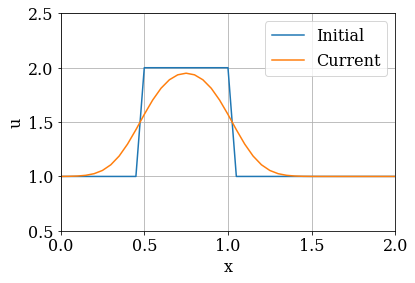

In [9]:
pyplot.figure()
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial')
pyplot.plot(x, u ,label='Current')
pyplot.legend(loc='upper right')
pyplot.xlim(0.0, L)
pyplot.ylim(0.5, 2.5)

In [10]:
def diffusion(u0, sigma=0.5, nt=20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        u[1:-1] = un[1:-1] + sigma * (un[:-2] - 2 * un[1:-1] + un[2:])
        u_hist.append(u.copy())
    return u_hist

In [11]:
def diffusion_naive(u0, sigma=0.5, nt=20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx - 1):
            u[i] = un[i] + sigma * (un[i -1] - 2 * u[i] + u[i +1])
        u_hist.append(u.copy())
    return u_hist

In [12]:
%%timeit
u_tmp = diffusion(u0, sigma=sigma, nt=1000)

7.76 ms ± 78.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
u_tmp = diffusion_naive(u0, sigma=sigma, nt=1000)

66 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
u_hist = diffusion(u0, sigma=sigma, nt=nt)

In [16]:
def plot_solution(n, u_hist, x):
    pyplot.figure()
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u_hist[0], label='Initial')
    pyplot.plot(x, u_hist[n], label=f'Time step{n}')
    pyplot.legend()
    pyplot.xlim(0.0, 2.0)
    pyplot.ylim(0.5, 2.5)
    pyplot.show()

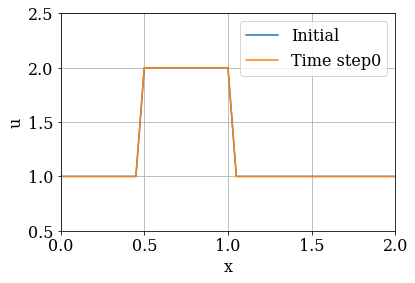

In [17]:
plot_solution(0, u_hist, x)

In [18]:
import ipywidgets

In [19]:
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,description='Time step')

w = ipywidgets.interactive(plot_solution, n=nt_slider, u_hist=ipywidgets.fixed(u_hist), x=ipywidgets.fixed(x))

In [20]:
display(w)

interactive(children=(IntSlider(value=0, description='Time step', max=20), Output()), _dom_classes=('widget-in…

In [21]:
u_hist = diffusion(u0, sigma=0.6, nt=nt)
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='Time step')

w = ipywidgets.interactive(plot_solution, n=nt_slider, u_hist=ipywidgets.fixed(u_hist), x=ipywidgets.fixed(x))

In [22]:
display(w)

interactive(children=(IntSlider(value=0, description='Time step', max=20), Output()), _dom_classes=('widget-in…